## K-Nearest Neighbors

Supervised Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

csv_file = "data/telecom_churn_clean.csv"

churn_df = pd.read_csv(csv_file, sep=',')

### Data Explore

In [2]:
churn_df.head()

Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  \
0           0             128        415                   0                1   
1           1             107        415                   0                1   
2           2             137        415                   0                0   
3           3              84        408                   1                0   
4           4              75        415                   1                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer_service_calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

In [3]:
churn_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3333 non-null   int64  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   int64  
 4   voice_mail_plan         3333 non-null   int64  
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [4]:
churn_df.describe()

Unnamed: 0  account_length    area_code  international_plan  \
count  3333.00000     3333.000000  3333.000000         3333.000000   
mean   1666.00000      101.064806   437.182418            0.096910   
std     962.29855       39.822106    42.371290            0.295879   
min       0.00000        1.000000   408.000000            0.000000   
25%     833.00000       74.000000   408.000000            0.000000   
50%    1666.00000      101.000000   415.000000            0.000000   
75%    2499.00000      127.000000   510.000000            0.000000   
max    3332.00000      243.000000   510.000000            1.000000   

       voice_mail_plan  number_vmail_messages  total_day_minutes  \
count      3333.000000            3333.000000        3333.000000   
mean          0.276628               8.099010         179.775098   
std           0.447398              13.688365          54.467389   
min           0.000000               0.000000           0.000000   
25%           0.000000               0.000000         143.700000   
50%           0.000000               0.000000         179.400000   
75%           1.000000              20.000000         216.400000   
max           1.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  customer_service_calls        churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

In [5]:
churn_rate = churn_df['churn'].mean()
print(f"The overall churn rate is: {churn_rate:.2%}")

The overall churn rate is: 14.49%


In [6]:
churn_df.groupby('area_code')['churn'].mean()

area_code
408    0.145585
415    0.142598
510    0.148810
Name: churn, dtype: float64

In [7]:
avg_call_duration = churn_df.groupby('area_code')[
    ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes']].mean()
print("Average call duration by area code:")
print(avg_call_duration)

Average call duration by area code:
           total_day_minutes  total_eve_minutes  total_night_minutes
area_code                                                           
408               177.175418         201.284248           199.214678
415               181.592628         200.652085           202.037583
510               178.787619         201.323929           200.229048


In [8]:
service_calls_churn = churn_df.groupby('customer_service_calls')['churn'].mean()
print("Churn rate by number of customer service calls:")
print(service_calls_churn)

Churn rate by number of customer service calls:
customer_service_calls
0    0.131994
1    0.103302
2    0.114625
3    0.102564
4    0.457831
5    0.606061
6    0.636364
7    0.555556
8    0.500000
9    1.000000
Name: churn, dtype: float64


### Data Preparation & First Analysis

In [9]:
# Prepare the data
X = churn_df.drop('churn', axis=1)  # Features
y = churn_df['churn']  # Target variable

In [10]:
print(X.shape, y.shape)

(3333, 19) (3333,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

Unnamed: 0  account_length  area_code  international_plan  \
817          817             243        510                   0   
1373        1373             108        415                   0   
679          679              75        415                   1   
56            56             141        415                   0   
1993        1993              86        510                   0   
...          ...             ...        ...                 ...   
1095        1095             106        510                   0   
1130        1130             122        415                   0   
1294        1294              66        408                   0   
860          860             169        415                   0   
3174        3174              36        408                   0   

      voice_mail_plan  number_vmail_messages  total_day_minutes  \
817                 0                      0               95.5   
1373                0                      0              112.0   
679                 0                      0              222.4   
56                  0                      0              126.9   
1993                0                      0              216.3   
...               ...                    ...                ...   
1095                0                      0              274.4   
1130                0                      0               35.1   
1294                0                      0               87.6   
860                 0                      0              179.2   
3174                1                     43               29.9   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
817                92             16.24              163.7               63   
1373              105             19.04              193.7              110   
679                78             37.81              327.0              111   
56                 98             21.57              180.0               62   
1993               96             36.77              266.3               77   
...               ...               ...                ...              ...   
1095              120             46.65              198.6               82   
1130               62              5.97              180.8               89   
1294               76             14.89              262.0              111   
860               111             30.46              175.2              130   
3174              123              5.08              129.1              117   

      total_eve_charge  total_night_minutes  total_night_calls  \
817              13.91                264.2                118   
1373             16.46                208.9                 93   
679              27.80                208.0                104   
56               15.30                140.8                128   
1993             22.64                214.0                110   
...                ...                  ...                ...   
1095             16.88                160.8                 62   
1130             15.37                251.6                 58   
1294             22.27                184.6                125   
860              14.89                228.6                 92   
3174             10.97                325.9                105   

      total_night_charge  total_intl_minutes  total_intl_calls  \
817                11.89                 6.6                 6   
1373                9.40                 4.1                 4   
679                 9.36                 8.7                 9   
56                  6.34                 8.0                 2   
1993                9.63                 4.5                 3   
...                  ...                 ...               ...   
1095                7.24                 6.0                 3   
1130               11.32                12.7                 2   
1294                8.31                 9.2                

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       566
           1       0.80      0.12      0.21       101

    accuracy                           0.86       667
   macro avg       0.83      0.56      0.57       667
weighted avg       0.85      0.86      0.82       667


### Balance the dataframe

In [14]:
# Separate the majority and minority classes
majority_class = churn_df[churn_df['churn'] == 0]
minority_class = churn_df[churn_df['churn'] == 1]

# Determine the number of samples to select from the majority class
num_samples = len(minority_class)

# Randomly select an equal number of samples from the majority class
majority_class_sampled = majority_class.sample(n=num_samples, random_state=42)

# Combine the minority class with the sampled majority class
balanced_data = pd.concat([majority_class_sampled, minority_class])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

In [15]:
X = balanced_data.drop('churn', axis=1)
Y = balanced_data['churn']

In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, Y)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       566
           1       0.45      0.61      0.52       101

    accuracy                           0.83       667
   macro avg       0.69      0.74      0.71       667
weighted avg       0.85      0.83      0.84       667


## Interpretation of Results

### Accuracy
- The overall accuracy of the model is 0.8260869565217391, which means that approximately 82.61% of the instances in the testing set were correctly classified by the model.

### Precision, Recall, and F1-score
- For class 0 (non-churned customers):
  - Precision is 0.93, indicating that 93% of the instances predicted as class 0 are actually class 0.
  - Recall is 0.86, meaning that 86% of the actual class 0 instances were correctly predicted by the model.
  - F1-score is 0.89, which is the harmonic mean of precision and recall for class 0.
- For class 1 (churned customers):
  - Precision is 0.45, indicating that 45% of the instances predicted as class 1 are actually class 1.
  - Recall is 0.61, meaning that 61% of the actual class 1 instances were correctly predicted by the model.
  - F1-score is 0.52, which is the harmonic mean of precision and recall for class 1.

### Support
- There are 566 instances of class 0 and 101 instances of class 1 in the testing set.

### Macro Average
- The macro average precision is 0.69, recall is 0.74, and F1-score is 0.71.

### Weighted Average
- The weighted average precision is 0.85, recall is 0.83, and F1-score is 0.84.

### Key Observations
- The overall accuracy of the model has improved to 82.61% compared to the previous results (71.66%).
- For class 0 (non-churned customers), the precision is high at 0.93, indicating that the model is correctly identifying a large proportion of non-churned customers. The recall for class 0 is also high at 0.86, suggesting that the model is capturing most of the actual non-churned customers.
- For class 1 (churned customers), the precision has increased to 0.45 compared to the previous results (0.33). This means that 45% of the instances predicted as churned customers are actually churned. While the precision is still relatively low, it has improved from the previous model.
- The recall for class 1 has decreased to 0.61 compared to the previous results (0.84). This suggests that the model is now missing some of the actual churned customers. However, the recall is still notably higher than the initial model (0.05).
- The F1-score for class 1 has improved to 0.52, considering both precision and recall. This indicates a better balance between precision and recall for the churned customers.
- The macro average metrics show improved values for precision (0.69), recall (0.74), and F1-score (0.71) compared to the previous model. This suggests that the model is performing better on average across both classes.
- The weighted average metrics also show improvements in precision (0.85), recall (0.83), and F1-score (0.84), taking into account the class distribution.

### Conclusion
The current model has achieved a higher overall accuracy of 82.61% compared to the previous model. It has improved precision for both classes, particularly for class 1 (churned customers), while maintaining a relatively high recall for class 0 (non-churned customers). The recall for class 1 has decreased compared to the previous model but is still significantly better than the initial model.

The model strikes a better balance between precision and recall for the churned customers, as indicated by the improved F1-score for class 1. The macro and weighted average metrics also suggest an overall improvement in the model's performance.

While the model's performance has enhanced, there is still room for further improvement, especially in terms of precision for class 1. Depending on the business requirements and the costs associated with false positives and false negatives, additional techniques such as feature selection, hyperparameter tuning, or exploring other algorithms can be considered to further optimize the model's performance.

### MANUAL PREDICTION

In [17]:
customers = churn_df[1200:1210]

print(customers['churn'])

customers = customers.drop('churn', axis=1)

predict = knn.predict(customers)

print(predict)


1200    0
1201    0
1202    0
1203    0
1204    1
1205    0
1206    0
1207    0
1208    0
1209    0
Name: churn, dtype: int64
[0 0 0 0 1 0 0 0 0 0]


### Optimize K

In [18]:
import numpy as np

train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

X = churn_df.drop('churn', axis=1)  # Features
y = churn_df['churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


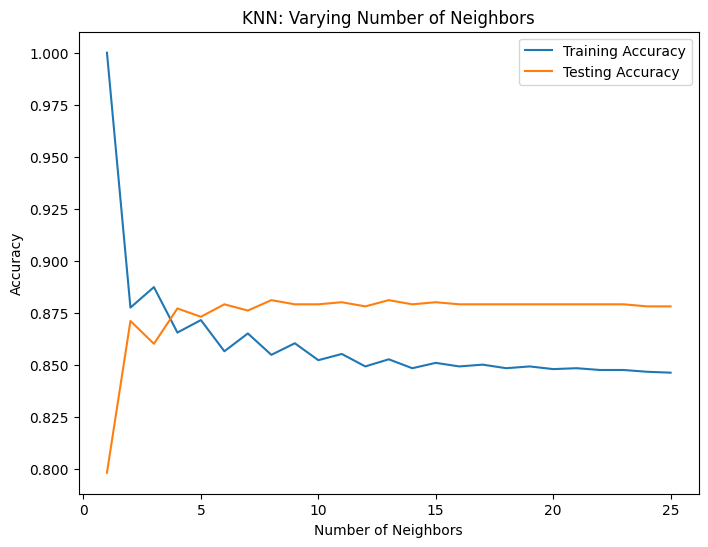

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.876
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       878
           1       0.43      0.05      0.09       122

    accuracy                           0.88      1000
   macro avg       0.66      0.52      0.51      1000
weighted avg       0.83      0.88      0.83      1000


In [21]:
customers = churn_df[2500:2510]

print(customers['churn'])

customers = customers.drop('churn', axis=1)

predict = knn.predict(customers)

print(predict)

2500    0
2501    0
2502    0
2503    0
2504    0
2505    0
2506    0
2507    0
2508    0
2509    0
Name: churn, dtype: int64
[0 0 0 0 0 0 0 0 0 0]


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,                                                     random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred))

[[1133    5]
 [ 185   11]]


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1138
           1       0.69      0.06      0.10       196

    accuracy                           0.86      1334
   macro avg       0.77      0.53      0.51      1334
weighted avg       0.83      0.86      0.80      1334


In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/Users/maro/ws/maro/python_lab/h_ai/machine_learning/a_scikit_learn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
